In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r WestIndies_2018

In [5]:
WestIndies_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
13,13,FA Allen (WI),4,4,0,25,10,6.25,52,48.07,...,131,0,-,-,5.69,-,0,0,0,0
37,37,D Bishoo (WI),10,6,4,65,29*,32.50,96,67.70,...,447,6,2/52,74.50,5.13,87.0,0,0,3,0
39,39,CR Brathwaite (WI),5,4,0,53,24,13.25,57,92.98,...,166,5,5/27,33.20,4.15,48.0,0,1,1,0
40,40,DM Bravo (WI),3,3,0,56,27,18.66,120,46.66,...,-,-,-,-,-,-,-,-,0,0
55,55,RL Chase (WI),3,3,0,49,32,16.33,76,64.47,...,101,2,2/47,50.50,5.05,60.0,0,0,0,0
63,63,SS Cottrell (WI),2,-,-,-,-,-,-,-,...,81,1,1/59,81.00,5.92,82.0,0,0,0,0
101,101,CH Gayle (WI),9,9,0,307,123,34.11,324,94.75,...,92,2,2/38,46.00,5.52,50.0,0,0,3,0
114,114,C Hemraj (WI),6,6,0,82,32,13.66,98,83.67,...,9,0,-,-,7.71,-,0,0,2,0
117,117,SO Hetmyer (WI),18,18,0,727,127,40.38,663,109.65,...,-,-,-,-,-,-,-,-,9,0
118,118,JO Holder (WI),15,15,3,405,99*,33.75,464,87.28,...,685,21,5/53,32.61,5.56,35.1,1,1,7,0


In [6]:
WestIndies_2018=WestIndies_2018.reset_index()

In [7]:
WestIndies_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,13,13,FA Allen (WI),4,4,0,25,10,6.25,52,...,131,0,-,-,5.69,-,0,0,0,0
1,37,37,D Bishoo (WI),10,6,4,65,29*,32.50,96,...,447,6,2/52,74.50,5.13,87.0,0,0,3,0
2,39,39,CR Brathwaite (WI),5,4,0,53,24,13.25,57,...,166,5,5/27,33.20,4.15,48.0,0,1,1,0
3,40,40,DM Bravo (WI),3,3,0,56,27,18.66,120,...,-,-,-,-,-,-,-,-,0,0
4,55,55,RL Chase (WI),3,3,0,49,32,16.33,76,...,101,2,2/47,50.50,5.05,60.0,0,0,0,0
5,63,63,SS Cottrell (WI),2,-,-,-,-,-,-,...,81,1,1/59,81.00,5.92,82.0,0,0,0,0
6,101,101,CH Gayle (WI),9,9,0,307,123,34.11,324,...,92,2,2/38,46.00,5.52,50.0,0,0,3,0
7,114,114,C Hemraj (WI),6,6,0,82,32,13.66,98,...,9,0,-,-,7.71,-,0,0,2,0
8,117,117,SO Hetmyer (WI),18,18,0,727,127,40.38,663,...,-,-,-,-,-,-,-,-,9,0
9,118,118,JO Holder (WI),15,15,3,405,99*,33.75,464,...,685,21,5/53,32.61,5.56,35.1,1,1,7,0


In [8]:
WestIndies_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
WestIndies_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),4,4,0,25,10,6.25,52,48.07,0,...,131,0,-,-,5.69,-,0,0,0,0
1,D Bishoo (WI),10,6,4,65,29*,32.50,96,67.70,0,...,447,6,2/52,74.50,5.13,87.0,0,0,3,0
2,CR Brathwaite (WI),5,4,0,53,24,13.25,57,92.98,0,...,166,5,5/27,33.20,4.15,48.0,0,1,1,0
3,DM Bravo (WI),3,3,0,56,27,18.66,120,46.66,0,...,-,-,-,-,-,-,-,-,0,0
4,RL Chase (WI),3,3,0,49,32,16.33,76,64.47,0,...,101,2,2/47,50.50,5.05,60.0,0,0,0,0
5,SS Cottrell (WI),2,-,-,-,-,-,-,-,-,...,81,1,1/59,81.00,5.92,82.0,0,0,0,0
6,CH Gayle (WI),9,9,0,307,123,34.11,324,94.75,1,...,92,2,2/38,46.00,5.52,50.0,0,0,3,0
7,C Hemraj (WI),6,6,0,82,32,13.66,98,83.67,0,...,9,0,-,-,7.71,-,0,0,2,0
8,SO Hetmyer (WI),18,18,0,727,127,40.38,663,109.65,3,...,-,-,-,-,-,-,-,-,9,0
9,JO Holder (WI),15,15,3,405,99*,33.75,464,87.28,0,...,685,21,5/53,32.61,5.56,35.1,1,1,7,0


In [10]:
WestIndies_2018_players =WestIndies_2018.copy()

In [11]:
WestIndies_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
WestIndies_2018_players.HS=WestIndies_2018_players.HS.str.extract('(\d+)')
WestIndies_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
WestIndies_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,4,4,0,25,10,6.25,52,48.07,0,0,...,131,0,-,-,5.69,-,0,0,0,0
1,10,6,4,65,29,32.50,96,67.70,0,0,...,447,6,2/52,74.50,5.13,87.0,0,0,3,0
2,5,4,0,53,24,13.25,57,92.98,0,0,...,166,5,5/27,33.20,4.15,48.0,0,1,1,0
3,3,3,0,56,27,18.66,120,46.66,0,0,...,-,-,-,-,-,-,-,-,0,0
4,3,3,0,49,32,16.33,76,64.47,0,0,...,101,2,2/47,50.50,5.05,60.0,0,0,0,0
5,2,-,-,-,0,-,-,-,-,-,...,81,1,1/59,81.00,5.92,82.0,0,0,0,0
6,9,9,0,307,123,34.11,324,94.75,1,1,...,92,2,2/38,46.00,5.52,50.0,0,0,3,0
7,6,6,0,82,32,13.66,98,83.67,0,0,...,9,0,-,-,7.71,-,0,0,2,0
8,18,18,0,727,127,40.38,663,109.65,3,2,...,-,-,-,-,-,-,-,-,9,0
9,15,15,3,405,99,33.75,464,87.28,0,3,...,685,21,5/53,32.61,5.56,35.1,1,1,7,0


In [14]:
WestIndies_2018_players.replace("-",0,inplace=True)

In [15]:
WestIndies_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

WestIndies_2018_players_scaled = pd.DataFrame(scaler.fit_transform(WestIndies_2018_players),columns=WestIndies_2018_players.columns)
WestIndies_2018_players_scaled.shape
WestIndies_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.698292,-0.514496,-0.656488,-0.619361,-0.794538,-0.725079,-0.561008,-0.419137,-0.383131,-0.612372,...,-0.492366,-0.209154,-0.762965,-1.137777,0.390094,-1.185256,-0.369274,-0.294884,-0.858833,-0.204124
1,0.370522,-0.171499,1.395037,-0.442804,-0.355184,0.950979,-0.400051,0.130179,-0.383131,-0.612372,...,0.738549,1.370500,0.370151,1.378085,0.166819,1.733598,-0.369274,-0.294884,0.102547,-0.204124
2,-0.520156,-0.514496,-0.656488,-0.495771,-0.470803,-0.278130,-0.542717,0.837603,-0.383131,-0.612372,...,1.969464,-0.034193,0.181299,-0.016615,-0.223913,0.425146,-0.369274,3.391165,-0.538373,-0.204124
3,-0.876428,-0.685994,-0.656488,-0.482529,-0.401432,0.067298,-0.312256,-0.458594,-0.383131,-0.612372,...,-0.492366,-0.864011,-0.762965,-1.137777,-1.878544,-1.185256,-0.369274,-0.294884,-0.858833,-0.204124
4,-0.876428,-0.685994,-0.656488,-0.513427,-0.285812,-0.081472,-0.473213,0.039793,-0.383131,-0.612372,...,0.123091,-0.359121,-0.385260,0.567605,0.134922,0.827747,-0.369274,-0.294884,-0.858833,-0.204124


In [17]:
WestIndies_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,8.881784e-18,1.776357e-17,-8.881784e-18,6.217249e-17,0.000000,1.243450e-16,-8.437695e-17,-1.776357e-17,-2.220446e-17,-4.440892e-17,...,-1.776357e-17,-2.442491e-17,2.220446e-18,-4.440892e-18,5.551115e-17,-1.199041e-16,8.881784e-17,-5.329071e-17,-8.881784e-18,-1.554312e-17
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,...,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00
min,-1.232699e+00,-1.200490e+00,-6.564880e-01,-7.297084e-01,-1.025778,-1.124140e+00,-7.512294e-01,-1.764306e+00,-3.831305e-01,-6.123724e-01,...,-4.923660e-01,-8.640111e-01,-7.629652e-01,-1.137777e+00,-1.878544e+00,-1.185256e+00,-3.692745e-01,-2.948839e-01,-8.588332e-01,-2.041241e-01
25%,-8.764277e-01,-8.574929e-01,-6.564880e-01,-6.326023e-01,-0.748291,-7.250786e-01,-6.561185e-01,-4.191373e-01,-3.831305e-01,-6.123724e-01,...,-4.923660e-01,-7.890275e-01,-7.629652e-01,-1.137777e+00,8.707743e-02,-1.185256e+00,-3.692745e-01,-2.948839e-01,-8.588332e-01,-2.041241e-01
50%,-3.420206e-01,-1.714986e-01,-6.564880e-01,-4.648735e-01,-0.355184,-1.395757e-01,-3.927347e-01,2.479901e-01,-3.831305e-01,-6.123724e-01,...,-4.923660e-01,-3.191302e-01,-3.852597e-01,1.040115e-02,3.223141e-01,1.970059e-01,-3.692745e-01,-2.948839e-01,-5.383731e-01,-2.041241e-01
75%,9.049294e-01,5.144958e-01,3.692745e-01,4.797043e-01,0.500402,5.768193e-01,4.339981e-01,6.780970e-01,-3.831305e-01,4.082483e-01,...,1.230915e-01,-3.419252e-02,1.812987e-01,5.196521e-01,4.817965e-01,6.264464e-01,-3.692745e-01,-2.948839e-01,7.434676e-01,-2.041241e-01
max,1.795608e+00,1.886484e+00,2.420799e+00,3.132467e+00,2.350317,3.172953e+00,3.539733e+00,1.464434e+00,3.208718e+00,2.449490e+00,...,3.815836e+00,2.560240e+00,3.202943e+00,2.644458e+00,1.223390e+00,2.035548e+00,2.708013e+00,3.391165e+00,2.345768e+00,4.898979e+00


In [18]:
X =  WestIndies_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.69829199, -0.51449576, -0.65648795, -0.61936051, -0.79453839,
        -0.72507865, -0.5610077 , -0.41913735, -0.38313051, -0.61237244,
        -0.80178373, -0.63742684, -0.55208333, -1.58541608, -0.69829199,
        -0.09683459, -0.22568757, -0.49236596, -0.20915427, -0.76296524,
        -1.13777749,  0.39009411, -1.18525592, -0.36927447, -0.29488391,
        -0.85883321, -0.20412415],
       [ 0.37052228, -0.17149859,  1.3950369 , -0.44280393, -0.35518364,
         0.95097934, -0.40005087,  0.13017939, -0.38313051, -0.61237244,
         1.87082869, -0.32373253, -0.68229167, -1.33228951,  0.37052228,
         1.22363706,  1.45854802,  0.73854895,  1.37050033,  0.37015145,
         1.37808452,  0.16681866,  1.73359782, -0.36927447, -0.29488391,
         0.10254725, -0.20412415],
       [-0.52015628, -0.51449576, -0.65648795, -0.4957709 , -0.47080331,
        -0.27812985, -0.54271715,  0.83760309, -0.38313051, -0.61237244,
        -0.80178373, -0.57468798, -0.421875  , -1.3111

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(WestIndies_2018_players_scaled))

False

In [23]:
WestIndies_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.698292,-0.514496,-0.656488,-0.619361,-0.794538,-0.725079,-0.561008,-0.419137,-0.383131,-0.612372,...,-0.492366,-0.209154,-0.762965,-1.137777,0.390094,-1.185256,-0.369274,-0.294884,-0.858833,-0.204124
1,0.370522,-0.171499,1.395037,-0.442804,-0.355184,0.950979,-0.400051,0.130179,-0.383131,-0.612372,...,0.738549,1.370500,0.370151,1.378085,0.166819,1.733598,-0.369274,-0.294884,0.102547,-0.204124
2,-0.520156,-0.514496,-0.656488,-0.495771,-0.470803,-0.278130,-0.542717,0.837603,-0.383131,-0.612372,...,1.969464,-0.034193,0.181299,-0.016615,-0.223913,0.425146,-0.369274,3.391165,-0.538373,-0.204124
3,-0.876428,-0.685994,-0.656488,-0.482529,-0.401432,0.067298,-0.312256,-0.458594,-0.383131,-0.612372,...,-0.492366,-0.864011,-0.762965,-1.137777,-1.878544,-1.185256,-0.369274,-0.294884,-0.858833,-0.204124
4,-0.876428,-0.685994,-0.656488,-0.513427,-0.285812,-0.081472,-0.473213,0.039793,-0.383131,-0.612372,...,0.123091,-0.359121,-0.385260,0.567605,0.134922,0.827747,-0.369274,-0.294884,-0.858833,-0.204124
5,-1.054563,-1.200490,-0.656488,-0.729708,-1.025778,-1.124140,-0.751229,-1.764306,-0.383131,-0.612372,...,-0.492366,-0.459100,-0.574112,1.597589,0.481797,1.565848,-0.369274,-0.294884,-0.858833,-0.204124
6,0.192387,0.342997,-0.656488,0.625363,1.818466,1.053778,0.433998,0.887134,0.814152,0.408248,...,-0.492366,-0.404112,-0.385260,0.415641,0.322314,0.492246,-0.369274,-0.294884,0.102547,-0.204124
7,-0.342021,-0.171499,-0.656488,-0.367767,-0.285812,-0.251951,-0.392735,0.577076,-0.383131,-0.612372,...,-0.492366,-0.819021,-0.762965,-1.137777,1.195481,-1.185256,-0.369274,-0.294884,-0.217913,-0.204124
8,1.795608,1.886484,-0.656488,2.479208,1.910962,1.454116,1.674097,1.304089,3.208718,1.428869,...,-0.492366,-0.864011,-0.762965,-1.137777,-1.878544,-1.185256,-0.369274,-0.294884,2.025308,-0.204124
9,1.261201,1.371989,0.882156,1.057927,1.263492,1.030792,0.946133,0.678097,-0.383131,2.449490,...,0.123091,2.560240,3.202943,-0.036539,0.338262,-0.007649,2.708013,3.391165,1.384388,-0.204124


In [24]:
np.all(np.isfinite(WestIndies_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


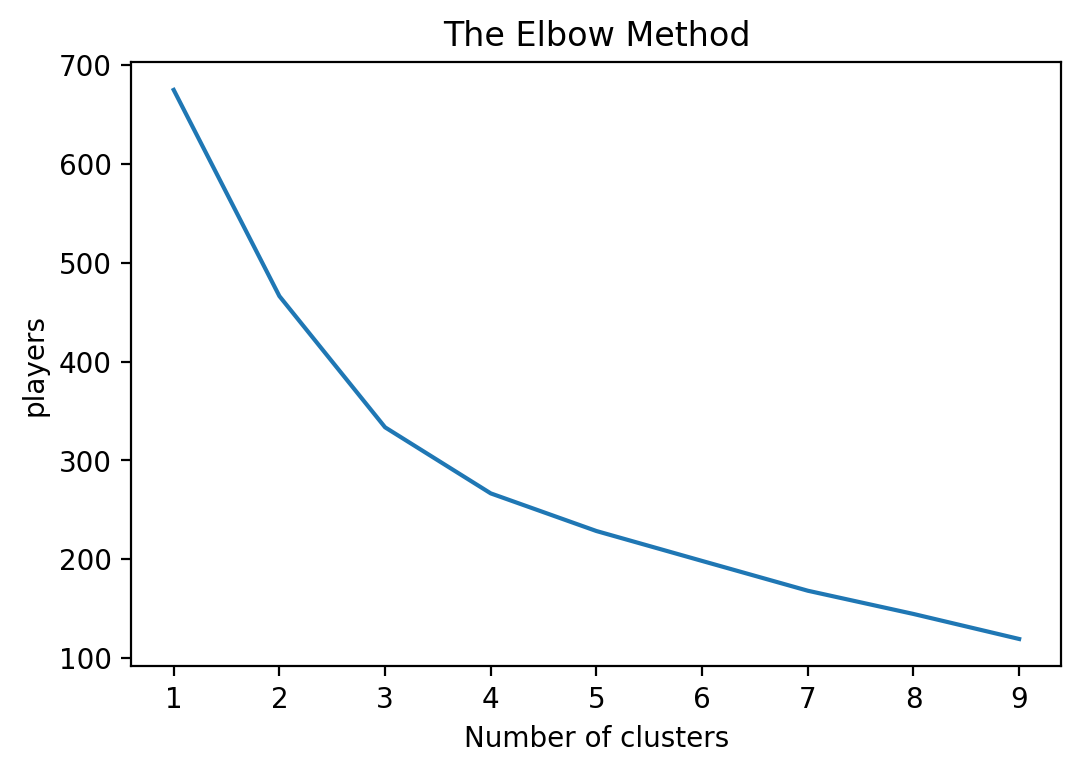

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0,
       1, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[-8.00083821e-01, -7.59493734e-01, -5.09950463e-01,
        -5.91615908e-01, -6.45884528e-01, -6.50283133e-01,
        -5.90011282e-01, -3.65928658e-01, -3.83130514e-01,
        -5.39470955e-01, -5.15432395e-01, -5.88132021e-01,
        -5.61383929e-01, -7.56968980e-02, -8.00083821e-01,
        -4.89832103e-01, -4.40540390e-01, -2.72559730e-01,
        -4.34819210e-01, -3.85259675e-01, -3.05811107e-02,
         2.37731397e-01, -8.72109404e-02, -1.49468239e-01,
        -3.15947049e-02, -6.52823110e-01, -2.04124145e-01],
       [ 1.17213298e+00,  1.25765629e+00, -5.81265374e-02,
         1.41913244e+00,  1.47546119e+00,  1.21872295e+00,
         1.41985869e+00,  5.50818521e-01,  1.21324663e+00,
         1.25876556e+00,  7.57240185e-01,  1.49569448e+00,
         1.40104167e+00,  5.99066215e-02,  1.17213298e+00,
        -3.53592964e-01, -5.45429169e-01, -3.89789721e-01,
        -5.55745150e-01, -5.11161529e-01, -3.13227634e-01,
        -7.59508659e-01, -3.12954801e-01, -3.69274473e-

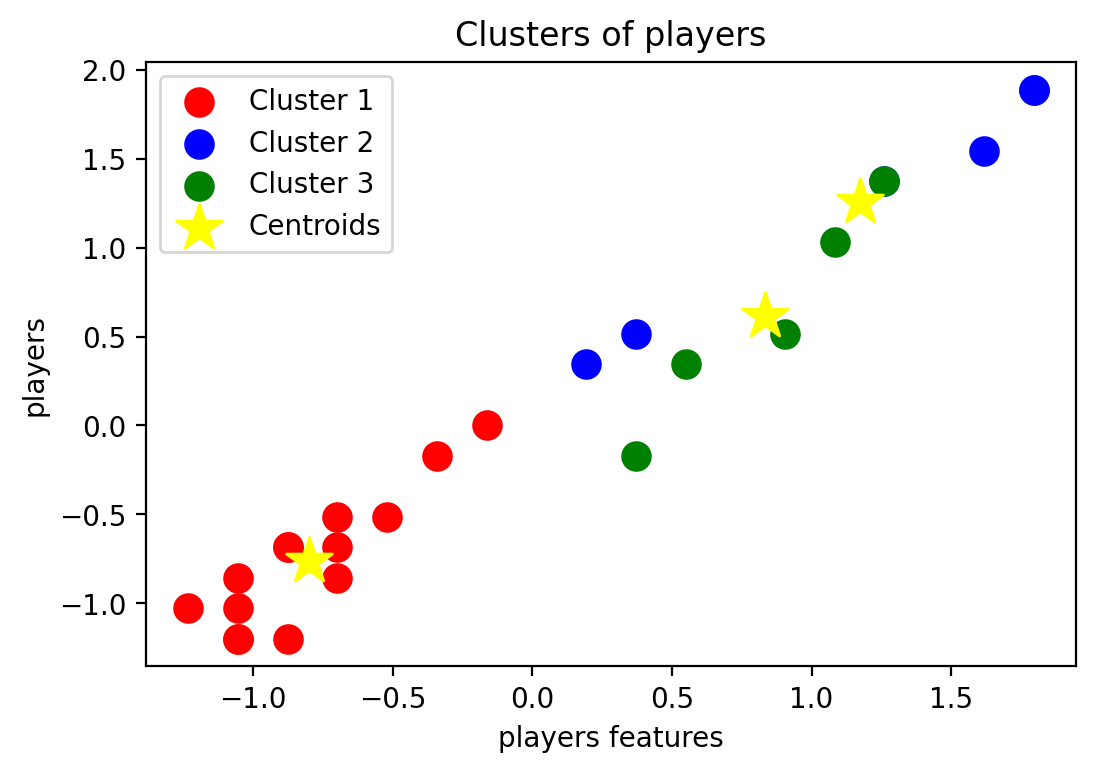

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
WestIndies_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),4,4,0,25,10,6.25,52,48.07,0,...,131,0,-,-,5.69,-,0,0,0,0
1,D Bishoo (WI),10,6,4,65,29*,32.50,96,67.70,0,...,447,6,2/52,74.50,5.13,87.0,0,0,3,0
2,CR Brathwaite (WI),5,4,0,53,24,13.25,57,92.98,0,...,166,5,5/27,33.20,4.15,48.0,0,1,1,0
3,DM Bravo (WI),3,3,0,56,27,18.66,120,46.66,0,...,-,-,-,-,-,-,-,-,0,0
4,RL Chase (WI),3,3,0,49,32,16.33,76,64.47,0,...,101,2,2/47,50.50,5.05,60.0,0,0,0,0
5,SS Cottrell (WI),2,-,-,-,-,-,-,-,-,...,81,1,1/59,81.00,5.92,82.0,0,0,0,0
6,CH Gayle (WI),9,9,0,307,123,34.11,324,94.75,1,...,92,2,2/38,46.00,5.52,50.0,0,0,3,0
7,C Hemraj (WI),6,6,0,82,32,13.66,98,83.67,0,...,9,0,-,-,7.71,-,0,0,2,0
8,SO Hetmyer (WI),18,18,0,727,127,40.38,663,109.65,3,...,-,-,-,-,-,-,-,-,9,0
9,JO Holder (WI),15,15,3,405,99*,33.75,464,87.28,0,...,685,21,5/53,32.61,5.56,35.1,1,1,7,0


In [31]:
WestIndies_2018["cluster"] = y_kmeans

In [32]:
WestIndies_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),4,4,0,25,10,6.25,52,48.07,0,...,0,-,-,5.69,-,0,0,0,0,0
1,D Bishoo (WI),10,6,4,65,29*,32.50,96,67.70,0,...,6,2/52,74.50,5.13,87.0,0,0,3,0,2
2,CR Brathwaite (WI),5,4,0,53,24,13.25,57,92.98,0,...,5,5/27,33.20,4.15,48.0,0,1,1,0,0
3,DM Bravo (WI),3,3,0,56,27,18.66,120,46.66,0,...,-,-,-,-,-,-,-,0,0,0
4,RL Chase (WI),3,3,0,49,32,16.33,76,64.47,0,...,2,2/47,50.50,5.05,60.0,0,0,0,0,0
5,SS Cottrell (WI),2,-,-,-,-,-,-,-,-,...,1,1/59,81.00,5.92,82.0,0,0,0,0,0
6,CH Gayle (WI),9,9,0,307,123,34.11,324,94.75,1,...,2,2/38,46.00,5.52,50.0,0,0,3,0,1
7,C Hemraj (WI),6,6,0,82,32,13.66,98,83.67,0,...,0,-,-,7.71,-,0,0,2,0,0
8,SO Hetmyer (WI),18,18,0,727,127,40.38,663,109.65,3,...,-,-,-,-,-,-,-,9,0,1
9,JO Holder (WI),15,15,3,405,99*,33.75,464,87.28,0,...,21,5/53,32.61,5.56,35.1,1,1,7,0,2


In [33]:
WestIndies_2018['cluster'].value_counts()

0    14
1     6
2     5
Name: cluster, dtype: int64

In [34]:
WestIndies_Cluster_2018 = np.array([14,6,5])

In [35]:
WestIndies_Cluster_2018

array([14,  6,  5])

In [36]:
%store WestIndies_Cluster_2018

Stored 'WestIndies_Cluster_2018' (ndarray)


In [37]:
WestIndies_2018_players_scaled.insert(0, 'Player', WestIndies_2018.Player)

In [38]:
WestIndies_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),-0.698292,-0.514496,-0.656488,-0.619361,-0.794538,-0.725079,-0.561008,-0.419137,-0.383131,...,-0.492366,-0.209154,-0.762965,-1.137777,0.390094,-1.185256,-0.369274,-0.294884,-0.858833,-0.204124
1,D Bishoo (WI),0.370522,-0.171499,1.395037,-0.442804,-0.355184,0.950979,-0.400051,0.130179,-0.383131,...,0.738549,1.370500,0.370151,1.378085,0.166819,1.733598,-0.369274,-0.294884,0.102547,-0.204124
2,CR Brathwaite (WI),-0.520156,-0.514496,-0.656488,-0.495771,-0.470803,-0.278130,-0.542717,0.837603,-0.383131,...,1.969464,-0.034193,0.181299,-0.016615,-0.223913,0.425146,-0.369274,3.391165,-0.538373,-0.204124
3,DM Bravo (WI),-0.876428,-0.685994,-0.656488,-0.482529,-0.401432,0.067298,-0.312256,-0.458594,-0.383131,...,-0.492366,-0.864011,-0.762965,-1.137777,-1.878544,-1.185256,-0.369274,-0.294884,-0.858833,-0.204124
4,RL Chase (WI),-0.876428,-0.685994,-0.656488,-0.513427,-0.285812,-0.081472,-0.473213,0.039793,-0.383131,...,0.123091,-0.359121,-0.385260,0.567605,0.134922,0.827747,-0.369274,-0.294884,-0.858833,-0.204124
5,SS Cottrell (WI),-1.054563,-1.200490,-0.656488,-0.729708,-1.025778,-1.124140,-0.751229,-1.764306,-0.383131,...,-0.492366,-0.459100,-0.574112,1.597589,0.481797,1.565848,-0.369274,-0.294884,-0.858833,-0.204124
6,CH Gayle (WI),0.192387,0.342997,-0.656488,0.625363,1.818466,1.053778,0.433998,0.887134,0.814152,...,-0.492366,-0.404112,-0.385260,0.415641,0.322314,0.492246,-0.369274,-0.294884,0.102547,-0.204124
7,C Hemraj (WI),-0.342021,-0.171499,-0.656488,-0.367767,-0.285812,-0.251951,-0.392735,0.577076,-0.383131,...,-0.492366,-0.819021,-0.762965,-1.137777,1.195481,-1.185256,-0.369274,-0.294884,-0.217913,-0.204124
8,SO Hetmyer (WI),1.795608,1.886484,-0.656488,2.479208,1.910962,1.454116,1.674097,1.304089,3.208718,...,-0.492366,-0.864011,-0.762965,-1.137777,-1.878544,-1.185256,-0.369274,-0.294884,2.025308,-0.204124
9,JO Holder (WI),1.261201,1.371989,0.882156,1.057927,1.263492,1.030792,0.946133,0.678097,-0.383131,...,0.123091,2.560240,3.202943,-0.036539,0.338262,-0.007649,2.708013,3.391165,1.384388,-0.204124


In [39]:
WestIndies_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,FA Allen (WI),-0.725079,-1.137777
1,D Bishoo (WI),0.950979,1.378085
2,CR Brathwaite (WI),-0.278130,-0.016615
3,DM Bravo (WI),0.067298,-1.137777
4,RL Chase (WI),-0.081472,0.567605
5,SS Cottrell (WI),-1.124140,1.597589
6,CH Gayle (WI),1.053778,0.415641
7,C Hemraj (WI),-0.251951,-1.137777
8,SO Hetmyer (WI),1.454116,-1.137777
9,JO Holder (WI),1.030792,-0.036539


In [40]:
WestIndies_2018_Ave=WestIndies_2018_players_scaled.mean()

In [41]:
WestIndies_2018_Ave

Mat_x           8.881784e-18
Inns_x          1.776357e-17
NO             -8.881784e-18
Runs_x          6.217249e-17
HS              0.000000e+00
Ave_x           1.243450e-16
BF             -8.437695e-17
SR_x           -1.776357e-17
100            -2.220446e-17
50             -4.440892e-17
0               1.776357e-17
4s              1.776357e-17
6s             -7.105427e-17
Unnamed: 0_y   -1.243450e-16
Mat_y           8.881784e-18
Inns_y         -1.065814e-16
Overs          -1.554312e-17
Mdns           -1.776357e-17
Runs_y         -2.442491e-17
Wkts            2.220446e-18
Ave_y          -4.440892e-18
Econ            5.551115e-17
SR_y           -1.199041e-16
4               8.881784e-17
5              -5.329071e-17
Ct             -8.881784e-18
St             -1.554312e-17
dtype: float64

In [42]:
WestIndies_Ave_2018 =WestIndies_2018_Ave[['Ave_x','Ave_y']]

In [43]:
WestIndies_Ave_2018

Ave_x    1.243450e-16
Ave_y   -4.440892e-18
dtype: float64

In [44]:
WestIndies_Ave_2018 = np.array([WestIndies_Ave_2018.Ave_x, WestIndies_Ave_2018.Ave_y])

In [45]:
WestIndies_Ave_2018

array([ 1.24344979e-16, -4.44089210e-18])

In [46]:
%store WestIndies_Ave_2018

Stored 'WestIndies_Ave_2018' (ndarray)


In [47]:
WestIndies_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),4,4,0,25,10,6.25,52,48.07,0,...,0,-,-,5.69,-,0,0,0,0,0
1,D Bishoo (WI),10,6,4,65,29*,32.50,96,67.70,0,...,6,2/52,74.50,5.13,87.0,0,0,3,0,2
2,CR Brathwaite (WI),5,4,0,53,24,13.25,57,92.98,0,...,5,5/27,33.20,4.15,48.0,0,1,1,0,0
3,DM Bravo (WI),3,3,0,56,27,18.66,120,46.66,0,...,-,-,-,-,-,-,-,0,0,0
4,RL Chase (WI),3,3,0,49,32,16.33,76,64.47,0,...,2,2/47,50.50,5.05,60.0,0,0,0,0,0
5,SS Cottrell (WI),2,-,-,-,-,-,-,-,-,...,1,1/59,81.00,5.92,82.0,0,0,0,0,0
6,CH Gayle (WI),9,9,0,307,123,34.11,324,94.75,1,...,2,2/38,46.00,5.52,50.0,0,0,3,0,1
7,C Hemraj (WI),6,6,0,82,32,13.66,98,83.67,0,...,0,-,-,7.71,-,0,0,2,0,0
8,SO Hetmyer (WI),18,18,0,727,127,40.38,663,109.65,3,...,-,-,-,-,-,-,-,9,0,1
9,JO Holder (WI),15,15,3,405,99*,33.75,464,87.28,0,...,21,5/53,32.61,5.56,35.1,1,1,7,0,2
